In [ ]:
from experiments.experiments_results import rank_results_agg_func, get_p_value
r, t = rank_results_agg_func(comp_col='nb_lags', based_on='user', rank_by='score', agg_func='mean', poi='imp', centroid='low_met')    
r

In [ ]:
from experiments.experiments_results import get_p_value
from experiments.experiments_results import get_experiments_data
from utils.utils import get_list_of_users

#get_p_value('arch', 'rnn', 'tcn', poi='imp', verbose=60)

users = get_list_of_users()
df = get_experiments_data()
low_met_users = [u for u in df.loc[df.centroid=='low_met',].user.unique() if u!=34]
high_met_users = [u for u in df.loc[df.centroid=='high_met',].user.unique() if u!=32]

print('x' * 100)
print('Bajo MET')
i = 0
j = 0
for u in low_met_users:
    if get_p_value('user', 34, u, poi='imp', verbose=1, force_test="student"):
        j += 1
    i += 1
print(f'{j} de {i} con diff estadistica')
i = 0
j = 0
print('x' * 100)
print('Alto MET')
for u in high_met_users:
    if get_p_value('user', 32, u, poi='imp', verbose=1, ):
        j += 1
  ):
          i += 1
print(f'{j} de {i} con diff estadistica')

In [ ]:
from experiments.experiments_results import get_p_value
from utils.utils import get_list_of_users

archs = ['cnn','mlp','rnn','tcn']
for i in archs:
    for j in archs: 
        if i < j:
            get_p_value(comp_col='arch', v1=i, v2=j, poi='imp', verbose=2, force_test="student", decil=6)

In [16]:
from experiments.experiments_results import get_p_value
from utils.utils import get_list_of_users

#get_p_value(comp_col='gran', v1=30, v2=60, verbose=2, rank_by='score', force_test='student')
for nb1 in [1,2,4,8]:
    for nb2 in [1,2,4,8]:
        if nb1 < nb2:
            get_p_value(comp_col='nb_lags', v1=nb1, v2=nb2, verbose=2,  rank_by='score', force_test='student', print_always=False)

****************
Comparing values 1 and 2 from nb_lags category, ranked by mean_time con **kwargs={'poi': 'imp', 'arch': 'rnn'}

Performing Student test
Ttest_indResult(statistic=-0.2977799372678204, pvalue=0.7659788748573105)

1 Valores NaN: 0 de 288
2 Valores NaN: 0 de 288

mean 1: 4.8108875
mean 2: 4.939743750000001

median 1: 2.9915999999999996
median 2: 3.0503

std 1: 5.086161548709004
std 2: 5.279346371450977




****************
Comparing values 1 and 4 from nb_lags category, ranked by mean_time con **kwargs={'poi': 'imp', 'arch': 'rnn'}

Performing Student test
Ttest_indResult(statistic=-0.322636398931621, pvalue=0.7470881089652255)

1 Valores NaN: 0 de 288
4 Valores NaN: 0 de 288

mean 1: 4.8108875
mean 4: 4.951031944444444

median 1: 2.9915999999999996
median 4: 3.0723000000000003

std 1: 5.086161548709004
std 4: 5.318084115317344




****************
Comparing values 1 and 8 from nb_lags category, ranked by mean_time con **kwargs={'poi': 'imp', 'arch': 'rnn'}

Performing Stu

In [26]:
get_p_value(comp_col='gran', v1=30, v2=60, verbose=2,  rank_by='time', poi='imp', force_test='student', print_always=True)


****************
Comparing values 30 and 60 from gran category, ranked by mean_time con **kwargs={'poi': 'imp'}

///Diferencia sifnificativa hallada///
Performing Student test
Ttest_indResult(statistic=14.123989227873023, pvalue=2.2530606702909455e-44)

30 Valores NaN: 0 de 2304
60 Valores NaN: 0 de 2304

mean 30: 2.779665798611111
mean 60: 1.4450139756944445

median 30: 1.0701
median 60: 0.5875

std 30: 4.071722364553344
std 60: 1.996355364025859






True

In [5]:
from experiments.experiments_results import filter_exp
df = filter_exp()

df.loc[df["gran"]==30,].shape

(4608, 20)

In [ ]:
from experiments.experiments_results import plot_iterations_time_pattern
plot_iterations_time_pattern(gran=30, poi='per', max_minutes=10)


In [ ]:
from experiments.experiments_results import plot_iterations_time_pattern
plot_iterations_time_pattern(gran=60, poi='per', max_minutes=10)


In [1]:
from experiments.experiments_results import get_delices
a = get_delices()
a

Using TensorFlow backend.


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
rnn,0.0298,0.09560,0.13220,0.16820,0.20712,0.2476,0.29564,0.35092,0.45444,0.65186,1.921800e+00
cnn,0.0128,0.09594,0.13908,0.18180,0.22836,0.2772,0.34340,0.46572,0.73752,15.60334,1.116669e+10
tcn,0.0120,0.10334,0.14628,0.18840,0.23736,0.2906,0.37528,0.55854,1.05576,38.82666,2.393080e+10
mlp,0.0280,0.10824,0.15020,0.19084,0.23920,0.2857,0.36444,0.52204,1.01768,30.44722,2.167729e+10


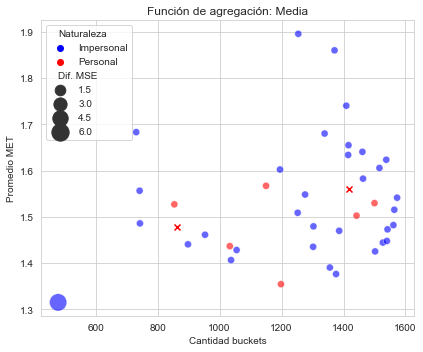

In [33]:
from experiments.experiments_results import get_clean_dataset,rank_results_agg_func
from os import listdir
import pickle as pkl
import numpy as np
import random 
import pandas as pd
import pickle
import time
import os 
from matplotlib import lines
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.stats import ttest_ind, wilcoxon
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
sns.set_style("whitegrid")

from preprocessing.datasets import get_clean_dataset
from utils.utils import get_experiment_combinations, get_granularity_from_minutes
from experiments.experiment_running import get_closests


AGGREGATION = 'Función de agregación:'
df = get_clean_dataset()
d = df.groupby(level=0)['slevel'].agg(['count', 'mean', 'std'])
nb_kmean = 2
kmeans = KMeans(n_clusters=nb_kmean).fit(d)
s, r = rank_results_agg_func(comp_col='gran', based_on='user', rank_by='score', agg_func='mean')    
l = list(r.best_rank_by.apply(list).values)
l_zipped = list(zip(*l))
best_poi = np.array(l_zipped[0])
worst_poi = np.array(l_zipped[1])
diff = worst_poi - best_poi 
poi = r["Puesto 1"]
d['MSE'] = diff
d['POI'] = poi
d.loc[d.POI==30,'POI'] = '30 minutos'
d.loc[d.POI==60,'POI'] = '1 hora'
colors = {'Personal': 'r', 'Impersonal': 'b'}

d.columns = ['Cantidad buckets', 'Promedio MET','Desviacion Estándar MET', 'Dif. MSE', 'Naturaleza']


fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))

g1 = sns.scatterplot(x='Cantidad buckets',
                y='Promedio MET',
                hue='Naturaleza',
                size='Dif. MSE',
                sizes=(50, 300),
                alpha=.6,
                data=d,
                palette=colors,
                ax=ax1)

ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', marker='x')
ax1.set_title(AGGREGATION + ' Media')

plt.tight_layout(w_pad=1)

plt.show()